In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vlad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


What are the most demanded skills for the top 3 most popular data roles?

In [20]:
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
451501,Data Scientist,Data Scientist,"Falköping, Sweden",via SimplyHired,Full-time,False,Sweden,2023-07-13 14:26:52,False,False,Sweden,None,NaN,NaN,Paniax AB,"[python, r, sas, sas, sql, aws, gcp, azure, ha...","{'analyst_tools': ['sas', 'tableau'], 'cloud':..."
196265,Data Engineer,"Manager, Data Engineering","Toronto, ON, Canada",via BeBee Canada,Full-time,False,Canada,2023-02-05 15:18:55,True,False,Canada,None,NaN,NaN,Data Axle,"[sql, java, python, aws, redshift, spark, kafk...","{'analyst_tools': ['tableau', 'cognos', 'power..."


<Axes: xlabel='quantity_of_skills', ylabel='job_skills'>

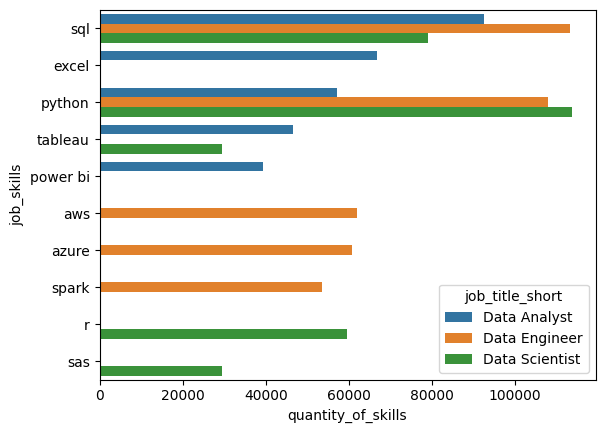

In [36]:
top_3_roles = df['job_title_short'].value_counts().head(3).index.tolist()
df_exploded = df.explode(column='job_skills')
df_ready = df_exploded[df_exploded['job_title_short'].isin(top_3_roles)]
qwer = df_ready.groupby(by= ['job_title_short','job_skills']).agg(
    quantity_of_skills=pd.NamedAgg(column='job_skills', aggfunc='count')
    ).reset_index().sort_values('quantity_of_skills', ascending=False )
top_skills_all = (
    qwer
    .sort_values(['job_title_short', 'quantity_of_skills'], ascending=[True, False])
    .groupby('job_title_short')
    .head(5)
)
top_skills_all = top_skills_all.reset_index(drop=True)
top_skills_all
sns.barplot(
    data=top_skills_all,
    x='quantity_of_skills',
    y='job_skills',
    hue='job_title_short'
)